# Decision Tree 
## TSF TASK4
### By Prakhar Mittal

In [1]:
#importing libraries 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv("C:/Users/SHERA/Downloads/Iris.csv")

from sklearn import datasets
iris = datasets.load_iris()

## Exploratory Analysis of Data

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Plots for Further Analysis 

<AxesSubplot:xlabel='Species', ylabel='count'>

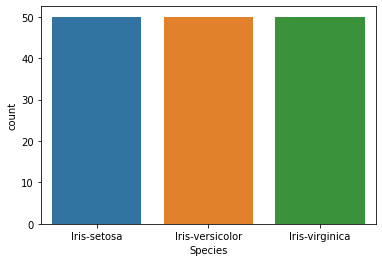

In [6]:
sns.countplot(df["Species"])

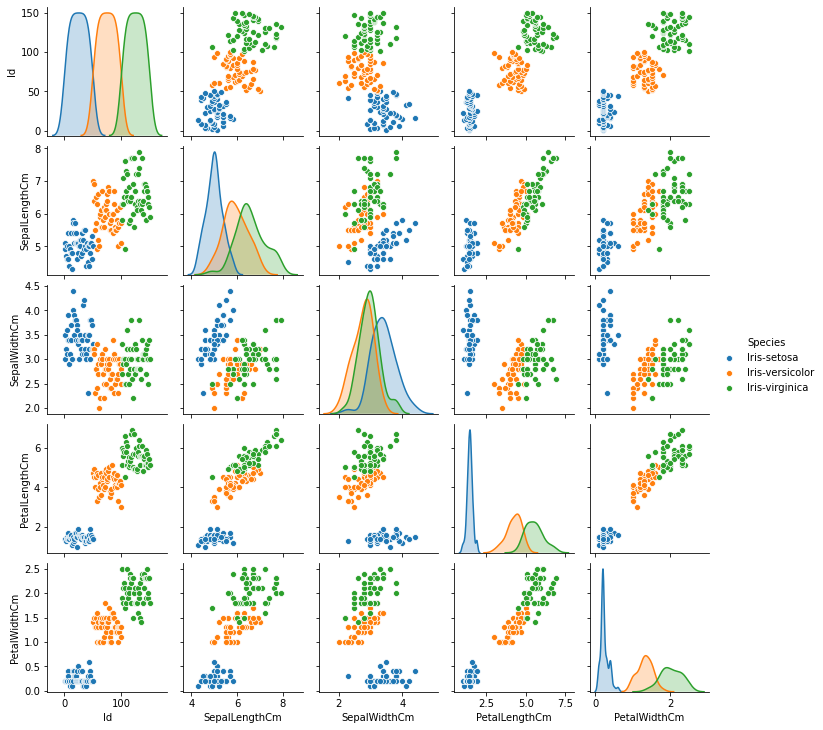

In [7]:
sns.pairplot(df, hue = "Species" ,height = 2)

<AxesSubplot:>

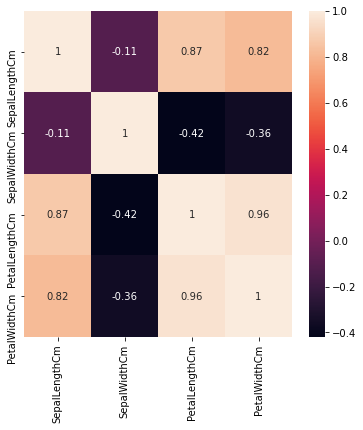

In [8]:
corr = df.drop("Id",axis=1).corr(method = "pearson")
plt.figure(figsize = (6,6))
sns.heatmap(corr , annot=True)

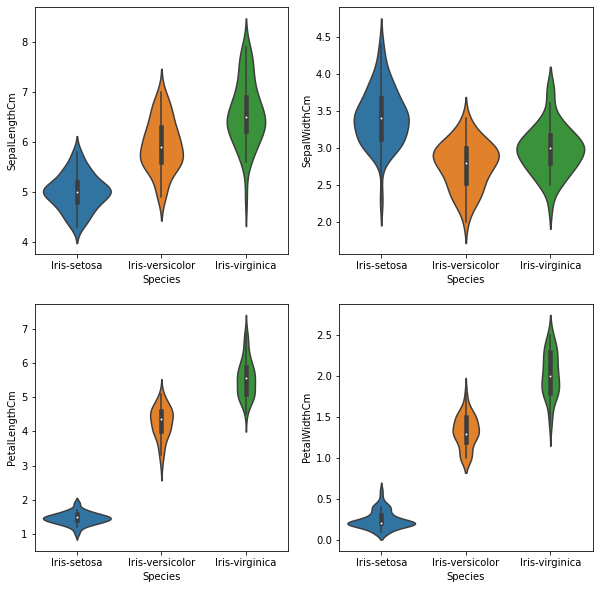

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.show()

## Model Training

In [11]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier(criterion = "entropy" , random_state=0)
dect.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
dect.score(X_test,y_test)

0.9736842105263158

## Predictions from the Model

In [15]:
y_pred = dect.predict(X_test)

In [16]:
data = pd.DataFrame({"Actual":y_test, "Predicted": y_pred})
data.head(10)

,Actual,Predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


## Decision Tree Representaion

In [17]:
from sklearn import tree
import graphviz
dectree = tree.export_graphviz(dect, feature_names=iris.feature_names,  
                                class_names=iris.target_names, filled=True)

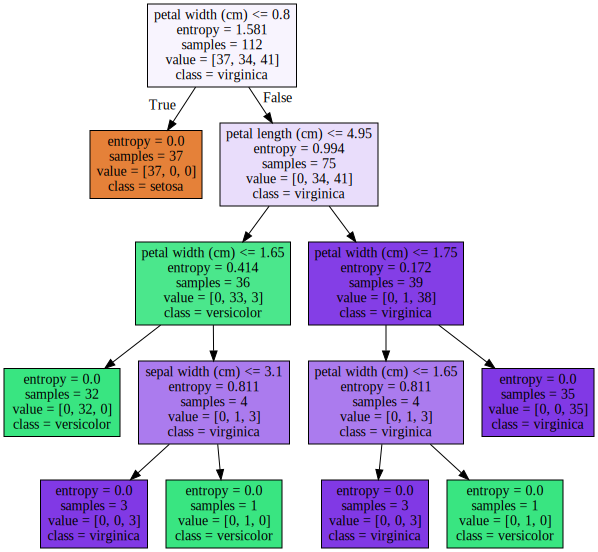

In [18]:
gph = graphviz.Source(dectree, format="png")
gph

## Confusion Matrix & Accuracy of Model

In [19]:
from sklearn.metrics import confusion_matrix,accuracy_score
c = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [20]:
print("Confusion Matrix : \n", c)

Confusion Matrix : 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [21]:
print("Accuracy : ",ac)

Accuracy :  0.9736842105263158
